### Bhagyashree Deshpande

# Classify the Size_Categories using SVM

## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

## Import Data

In [2]:
data = pd.read_csv('forestfires.csv')
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


## Data Understanding

In [3]:
data.shape

(517, 31)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
data.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [6]:
data.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [7]:
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
forest_data = data.drop(data.columns[11:30], axis = 1)
forest_data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


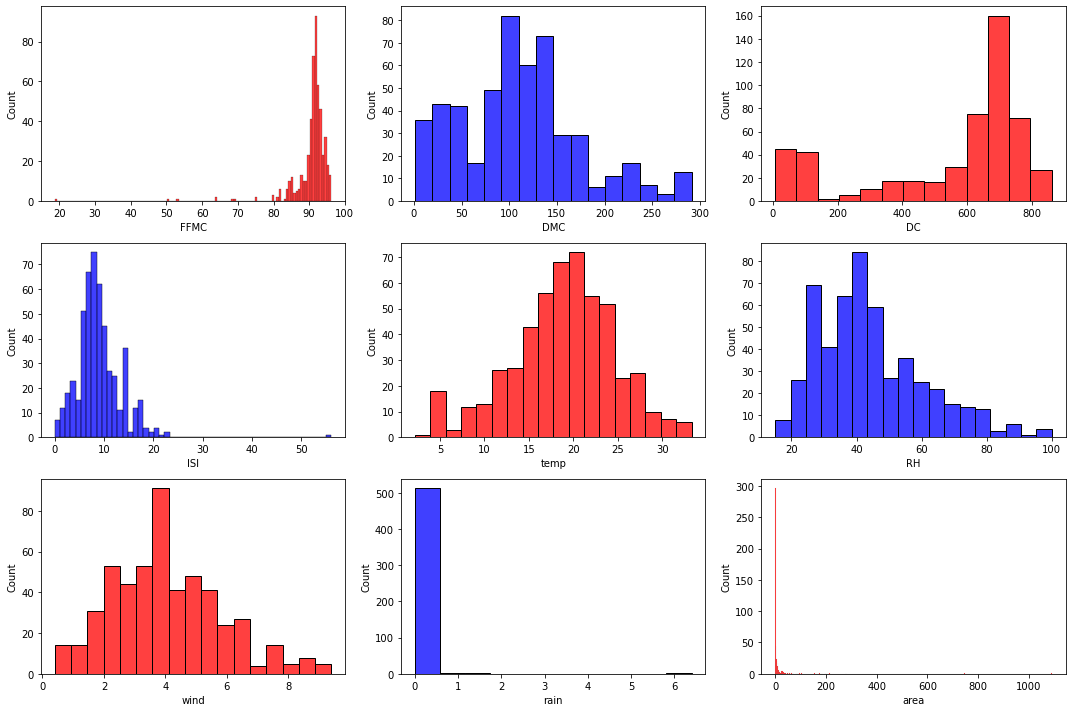

In [11]:
fig, ax = plt.subplots(3, 3, figsize = (15,10))

sns.histplot(forest_data.FFMC, ax = ax[0,0], color = 'r')
sns.histplot(forest_data.DMC, ax = ax[0,1], color = 'b')
sns.histplot(forest_data.DC, ax = ax[0,2], color = 'r')
sns.histplot(forest_data.ISI, ax = ax[1,0], color = 'b')
sns.histplot(forest_data.temp, ax = ax[1,1], color = 'r')
sns.histplot(forest_data.RH, ax = ax[1,2], color = 'b')
sns.histplot(forest_data.wind, ax = ax[2,0], color = 'r')
sns.histplot(forest_data.rain, ax = ax[2,1], color = 'b')
sns.histplot(forest_data.area, ax = ax[2,2], color = 'r')

plt.tight_layout();

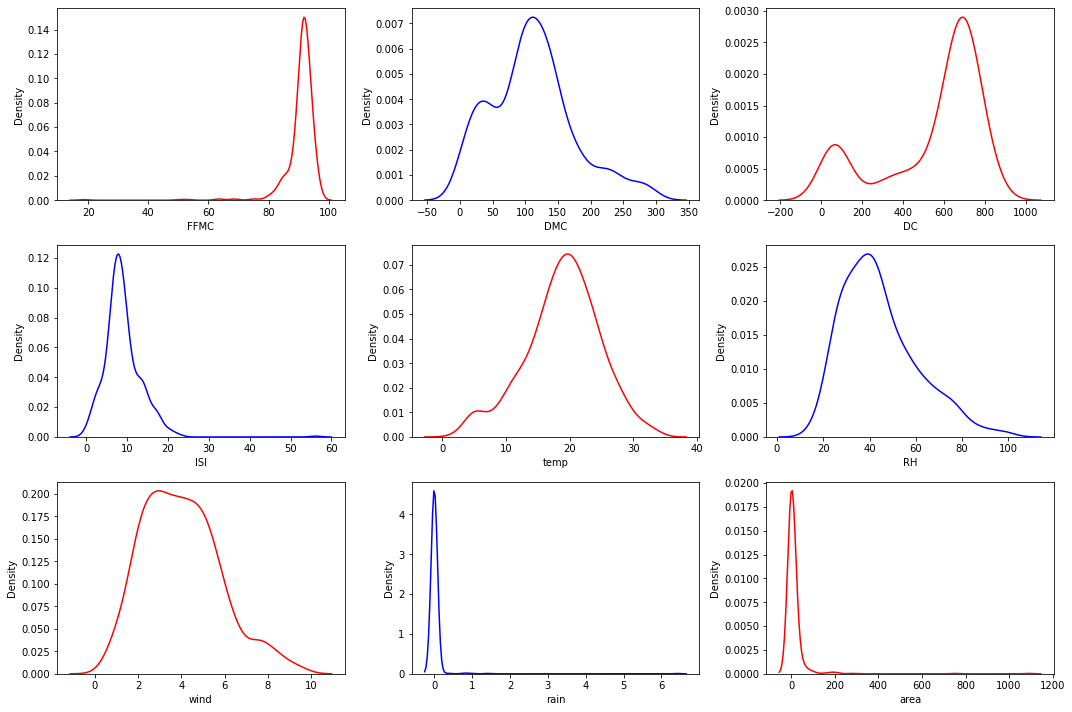

In [12]:
fig, ax = plt.subplots(3, 3, figsize = (15,10))

sns.kdeplot(forest_data.FFMC, ax = ax[0,0], color = 'r')
sns.kdeplot(forest_data.DMC, ax = ax[0,1], color = 'b')
sns.kdeplot(forest_data.DC, ax = ax[0,2], color = 'r')
sns.kdeplot(forest_data.ISI, ax = ax[1,0], color = 'b')
sns.kdeplot(forest_data.temp, ax = ax[1,1], color = 'r')
sns.kdeplot(forest_data.RH, ax = ax[1,2], color = 'b')
sns.kdeplot(forest_data.wind, ax = ax[2,0], color = 'r')
sns.kdeplot(forest_data.rain, ax = ax[2,1], color = 'b')
sns.kdeplot(forest_data.area, ax = ax[2,2], color = 'r')

plt.tight_layout();

In [13]:
label_encoder = preprocessing.LabelEncoder()
forest_data['size_category'] = label_encoder.fit_transform(forest_data['size_category'])
forest_data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [14]:
forest_data.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace = True)
forest_data.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace = True)

In [15]:
forest_data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [16]:
forest_data.shape

(517, 12)

In [17]:
forest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    int64  
 1   day            517 non-null    int64  
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    int32  
dtypes: float64(8), int32(1), int64(3)
memory usage: 46.6 KB


In [18]:
forest_data.dtypes

month              int64
day                int64
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
size_category      int32
dtype: object

## Model Building

In [19]:
X = forest_data.iloc[:,0:11].values
y = forest_data.iloc[:,-1].values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 31)

In [21]:
X_train.shape, y_train.shape

((413, 11), (413,))

In [22]:
X_test.shape, y_test.shape

((104, 11), (104,))

### RBF Kernel

In [23]:
model_1 = SVC()
param_grid = [{'kernel' : ['rbf'], 'gamma' : [50, 5, 10, 0.5], 'C' : [15,14,13,12,11,10,0.1,0.001]}]
gsv = GridSearchCV(model_1, param_grid, cv = 10)
gsv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [24]:
gsv.best_params_, gsv.best_score_

({'C': 15, 'gamma': 0.5, 'kernel': 'rbf'}, 0.7432055749128919)

## Model Testing

In [25]:
model_1 = SVC(C = 15, gamma = 0.5, kernel = 'rbf')
model_1.fit(X_train, y_train)

y_pred = model_1.predict(X_test)
accuracy_1 = accuracy_score(y_test, y_pred) * 100

print('Accuracy Score   :', accuracy_1)
print('Confusion Matrix :\n', confusion_matrix(y_test, y_pred))

Accuracy Score   : 72.11538461538461
Confusion Matrix :
 [[ 0 29]
 [ 0 75]]


### Poly Kernal

In [26]:
model_2 = SVC()
param_grid_2 = [{'kernel' : ['poly'], 'gamma' : [50,5,0.5,0.2,0.1,0.05], 'C' : [15,14,20,30,35,48,12,16,29]}]
gsv_2 = GridSearchCV(model_2, param_grid_2, cv = 10)
gsv_2.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 20, 30, 35, 48, 12, 16, 29],
                          'gamma': [50, 5, 0.5, 0.2, 0.1, 0.05],
                          'kernel': ['poly']}])

In [27]:
gsv_2.best_params_, gsv_2.best_score_

({'C': 15, 'gamma': 50, 'kernel': 'poly'}, 0.9759581881533101)

## Model Testing

In [28]:
model_2 = SVC(C = 15, gamma = 50, kernel = 'poly')
model_2.fit(X_train, y_train)

y_pred = model_2.predict(X_test)
accuracy_2 = accuracy_score(y_test, y_pred) * 100

print('Accuracy Score   :', accuracy_2)
print('Confusion Matrix :\n', confusion_matrix(y_test, y_pred))

Accuracy Score   : 96.15384615384616
Confusion Matrix :
 [[28  1]
 [ 3 72]]


### Sigmoid Kernel

In [29]:
model_3 = SVC()
param_grid_3 = [{'kernel' : ['sigmoid'], 'gamma' : [30,50,5,0.5,0.2,0.1,0.05], 'C' : [15,14,20,30,35,48,12,16,29]}]
gsv_3 = GridSearchCV(model_3, param_grid_3, cv = 10)
gsv_3.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 20, 30, 35, 48, 12, 16, 29],
                          'gamma': [30, 50, 5, 0.5, 0.2, 0.1, 0.05],
                          'kernel': ['sigmoid']}])

In [30]:
gsv_3.best_params_, gsv_3.best_score_

({'C': 15, 'gamma': 30, 'kernel': 'sigmoid'}, 0.7336236933797908)

## Model Testing

In [31]:
model_3 = SVC(C = 15, gamma = 30, kernel = 'sigmoid')
model_3.fit(X_train, y_train)

y_pred = model_3.predict(X_test)
accuracy_3 = accuracy_score(y_test, y_pred) * 100

print('Accuracy Score   :', accuracy_3)
print('Confusion Matrix :\n', confusion_matrix(y_test, y_pred))

Accuracy Score   : 72.11538461538461
Confusion Matrix :
 [[ 0 29]
 [ 0 75]]


In [32]:
table = {'Model' : ['rbf', 'poly', 'sigmoid'], 'Score' : [accuracy_1, accuracy_2, accuracy_3]}
table = pd.DataFrame(table)
table

,Model,Score
0,rbf,72.115385
1,poly,96.153846
2,sigmoid,72.115385


## Conclusion

From the above table, we observe that the Polynomial kernel gives the best accuracy compared to the other kernels. Hence, Polynomial kernel can be used in the SVM model to classify the size of the forest fire area.

## ========================================================================

# Prepare a classification model using SVM for salary data

## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

## Import Data

In [2]:
sal_test = pd.read_csv('SalaryData_Test(1).csv')
sal_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [3]:
sal_train = pd.read_csv('SalaryData_Train(1).csv')
sal_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Data understanding

In [4]:
sal_test.shape, sal_train.shape

((15060, 14), (30161, 14))

In [5]:
sal_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [6]:
sal_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [7]:
sal_test.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [8]:
sal_train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [9]:
sal_test.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [10]:
sal_train.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [11]:
sal_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [12]:
sal_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [13]:
sal_test = sal_test.apply(LabelEncoder().fit_transform)
sal_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,39,37,0
1,21,2,11,8,2,4,0,4,1,0,0,49,37,0
2,11,1,7,11,2,10,0,4,1,0,0,39,37,1
3,27,2,15,9,2,6,0,2,1,87,0,39,37,1
4,17,2,0,5,4,7,1,4,1,0,0,29,37,0


In [14]:
sal_train = sal_train.apply(LabelEncoder().fit_transform)
sal_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,24,0,39,37,0
1,33,4,9,12,2,3,0,4,1,0,0,12,37,0
2,21,2,11,8,0,5,1,4,1,0,0,39,37,0
3,36,2,1,6,2,5,0,2,1,0,0,39,37,0
4,11,2,9,12,2,9,5,2,0,0,0,39,4,0


## Model Building

In [15]:
X_train = sal_train.drop(['education', 'relationship', 'native', 'maritalstatus', 'sex', 'race'], axis = 1)
y_train = sal_train['Salary']

In [16]:
X_test = sal_test.drop(['education', 'relationship', 'native', 'maritalstatus', 'sex', 'race'], axis = 1)
y_test = sal_test['Salary']

### RBF Kernal

In [17]:
model_1 = svm.SVC(kernel = 'rbf', C = 10, gamma = 0.5)
model_1.fit(X_train, y_train)
score_model_1 = model_1.score(X_test, y_test)
print('Accuracy Score :', score_model_1)

Accuracy Score : 0.8810756972111554


### Poly Kernel

In [19]:
model_2 = svm.SVC(kernel = 'poly', C = 10, gamma = 0.5)
model_2.fit(X_train, y_train)
score_model_2 = model_2.score(X_test, y_test)
print('Accuracy Score :', score_model_2)

Accuracy Score : 1.0


### Sigmoid Kernel

In [22]:
model_3 = svm.SVC(kernel = 'sigmoid', C = 10, gamma = 0.5)
model_3.fit(X_train, y_train)
score_model_3 = model_3.score(X_test, y_test)
print('Accuracy Score :', score_model_3)

Accuracy Score : 0.7543160690571049


## Model Testing

In [24]:
classifier = SVC(kernel = 'poly', C = 10, gamma = 0.5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100

print('Accuracy Score   :', accuracy)
print('Confusion Matrix :\n', confusion_matrix(y_test, y_pred))

Accuracy Score   : 100.0
Confusion Matrix :
 [[11360     0]
 [    0  3700]]


In [26]:
table = {'Model' : ['rbf', 'poly', 'sigmoid'], 'Accuracy Score' : [score_model_1, score_model_2, score_model_3]}
table = pd.DataFrame(table)
table

,Model,Accuracy Score
0,rbf,0.881076
1,poly,1.000000
2,sigmoid,0.754316


## Conclusion
From the above table, we can observe that the polynomial kernel gives the better accuracy compared to the other kernels. Hence, polynomial kernel would be better to classify the salary data.